# Lab 4: Modeling

## Conda

1. Go to this website: https://docs.conda.io/projects/conda/en/latest/user-guide/install/index.html
2. Follow the instructions and the note below to install either miniconda or Anaconda (if you don't have much space on your computer, maybe miniconda is better, but otherwise, choose Anaconda)
    - **Important Note:** Make sure to install conda in a place where you know where it is. For example, I have it installed in /Users/aathreyakadambi/Documents/software/python/anaconda. If you need help using your file system, let us know!
3. Create a conda environment using the command: `conda create --name saas-df numpy pandas matplotlib`. This creates a new "environment" called "saas-df". An environment is basically a place where you can install packages for use in other code.
4. Run `conda activate saas-df` to activate your DF environment before you run `pip` or `python` commands. If you are running a notebook, use the conda environment.

Why Conda? Since Python is a very fast paced language that changes extremely quickly, backward compatibility is sometimes impossible, and people simply ignore that principle in order to adopt better things more quickly. As such, if you run some code on your computer and send it to someone else, there's a very good chance they'll run into a ton of errors relating to package versions and dependency issues. With conda, you can delegate this responsibility of managing package versions and compatibility to your environment, and conda environments are much easier to share via `.yml` files.

## Scikit-learn and Overfitting

In [2]:
!pip install scikit-learn

/Users/aathreyakadambi/.zshenv:1: permission denied: /usr/local/texlive/2024basic/bin
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 35.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 35.6 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Generate some random data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, single feature
y = 4 + 3 * X ** 5 + 4 * np.random.randn(100, 1)  # Quadratic relation with some noise

Notice that the relationship between $X$ and $y$ here is actually a polynomial. To deal with this, we use a simple trick: preprocessing. Instead of directly using $x$ as our data point, we will use $x^\alpha$, where $\alpha$ is a hyperparameter. Our linear regression model will be:

Given data $x$ and $y$, fit parameters $m$ and $b$ so that $y \approx mx^\alpha + b$.

Note that this is the same as doing a simple linear regression with "data" $x^\alpha$ and $y$.

In [21]:
# Train-Valid-Test Split 
# Since we want to do hyperparameter tuning, let's have a validation split
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

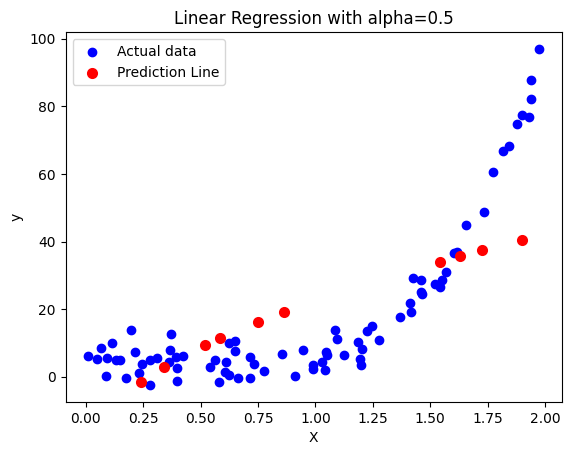

Intercept: -24.75
Coefficient: 47.28


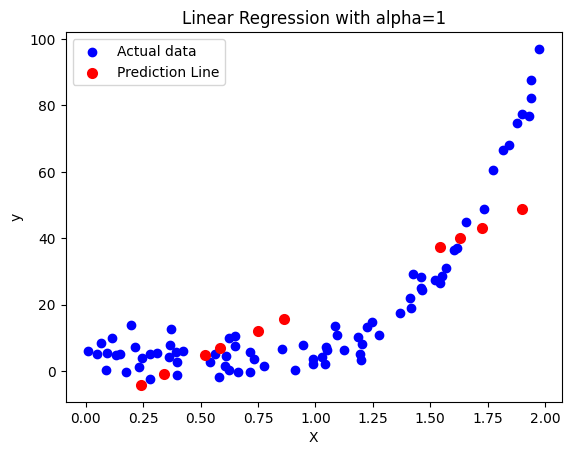

Intercept: -11.74
Coefficient: 31.85


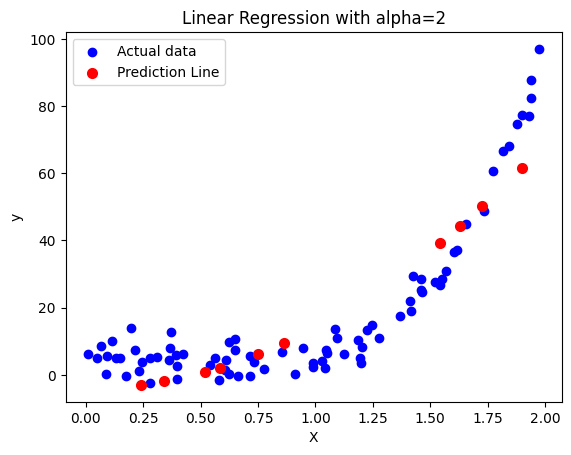

Intercept: -4.06
Coefficient: 18.20


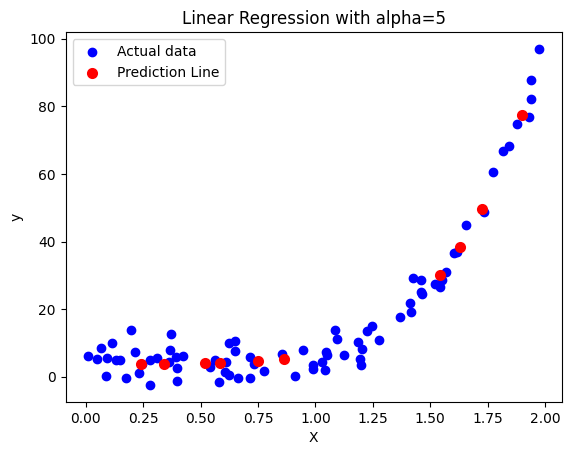

Intercept: 3.87
Coefficient: 2.99


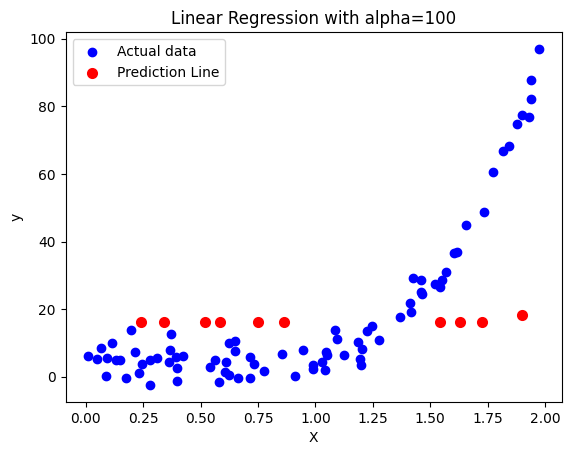

Intercept: 16.10
Coefficient: 0.00


In [23]:
from sklearn.linear_model import LinearRegression

alpha_vals = [ 0.5, 1, 2, 5, 100 ]

# let's fit a model for each possible alpha value (chosen via an educated guess)
for alpha in alpha_vals:
    # Preprocess the data
    X_train_alpha = [ x ** alpha for x in X_train ]
    X_val_alpha = [ x ** alpha for x in X_val ]

    # Create and fit the model
    model = LinearRegression()
    model.fit(..., ...) # fit 

    # Predict values
    y_pred = model.predict(...)

    # Plot the data and the regression line
    plt.scatter(X_train, y_train, color="blue", label="Actual data")
    plt.scatter(X_val, y_pred, color="red", linewidth=2, label="Prediction Line")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.title(f"Linear Regression with alpha={alpha}")
    plt.show()

    # Print model parameters
    print(f"Intercept: {model.intercept_[0]:.2f}")
    print(f"Coefficient: {model.coef_[0][0]:.2f}")

## DF PM

One day, you might find yourself in the position of being a DC PM or DM Director! This means that you will have to make many of the modeling decisions for your team, and give directions on what sorts of models to use. Often, you may have to come up with ideas for a space you've barely worked with before.

In groups of three, look at the problem on the board, which resembles something that a DC PM might be given by a client. Using all the resources available to you in the moment, draft a pitch to the client on what modeling techniques to use, and come up with three initial tasks for your DC members.